# Stock Market Analysis Capstone Project —— 股票分析项目

### 注意：该项目比平时的课堂练习更加富有挑战性，完成题目时请参考所给出的提示。

欢迎大家来到数量分析与金融建模的顶点项目（Capstone Project）! .
在这个项目里，我们将会分析某些汽车公司从2012年1月1日到2017年1月1日的股票数据。Let's get started!

### Part 0: Import

** 导入我们课上所学的你将会用到的几个库，如果没有一次性导入完全也没有关系，当你需要使用的时候，你可以随时返回到这个cell进行导入。:) **

In [8]:
import numpy as np
import pandas as pd
import pandas_datareader
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline


____
## Part 1: Getting the Data

### Tesla Stock (Ticker: TSLA on the NASDAQ)

** 将特斯拉股票从2012年1月1日到2017年1月1日的历史股票信息读入。**


In [9]:
tesla=pd.read_csv("./Tesla_Stock.csv")

In [10]:
tesla.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,28.94,29.50,27.65,28.08,928052
1,2012-01-04,28.21,28.67,27.50,27.71,630036
2,2012-01-05,27.76,27.93,26.85,27.12,1005432
3,2012-01-06,27.20,27.79,26.41,26.89,687081
4,2012-01-09,27.00,27.49,26.12,27.25,896951


### 其他汽车公司

** 重复上面的步骤来获取Ford(福特)和GM(通用汽车)的数据。 **


In [61]:
ford=pd.read_csv("Ford_Stock.csv")

In [62]:
ford.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,11.00,11.25,10.99,11.13,45709811
1,2012-01-04,11.15,11.53,11.07,11.30,79725188
2,2012-01-05,11.33,11.63,11.24,11.59,67877467
3,2012-01-06,11.74,11.80,11.52,11.71,59840605
4,2012-01-09,11.83,11.95,11.70,11.80,53981467


In [13]:
gm = pd.read_csv("GM_Stock.csv")

In [14]:
gm.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,20.83,21.18,20.75,21.05,9321420
1,2012-01-04,21.05,21.37,20.75,21.15,7856752
2,2012-01-05,21.10,22.29,20.96,22.17,17884040
3,2012-01-06,22.26,23.03,22.24,22.92,18234608
4,2012-01-09,23.20,23.43,22.70,22.84,12091714


## Part 2: Visualizing the Data 可视化

** 来进行数据可视化的操作吧！ **

** 按照题目指示或解释，一步步来完成相应的作图。 **


____

** 作出下面的折线图，图中需要展示所有汽车公司股票的Open price。提示：用plt.legend()来添加图例。**


In [15]:
# Code Here

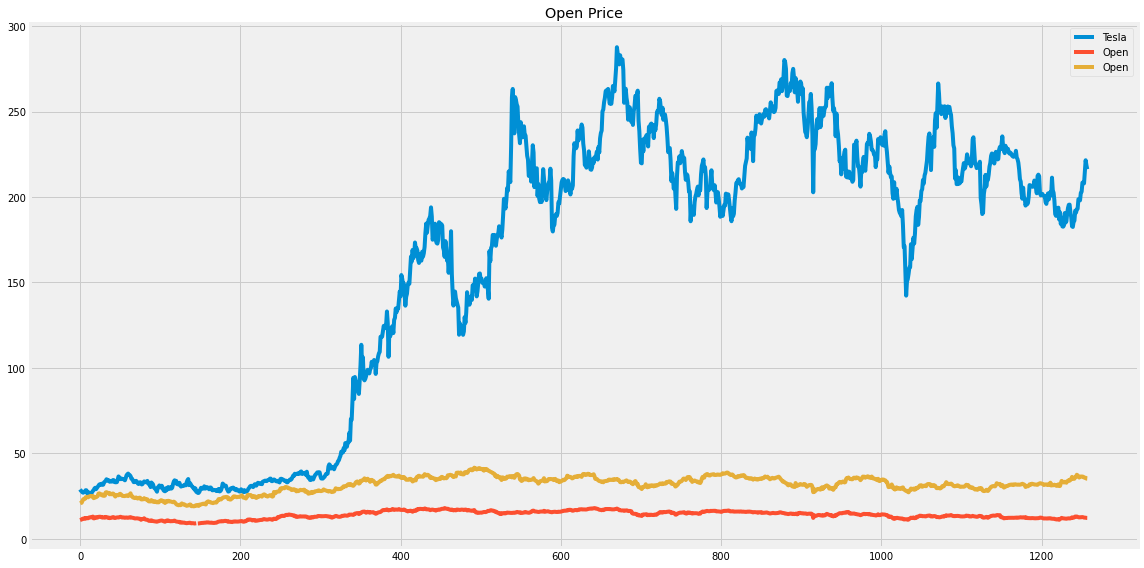

In [16]:
tesla['Open'].plot(title ='Open Price', label = 'Tesla', figsize = (16,8))
ford['Open'].plot(title ='Open Price')
gm['Open'].plot(title ='Open Price')

plt.legend()
plt.tight_layout()

____

** 画出所有股票的每日股票交易量(Volume)。**

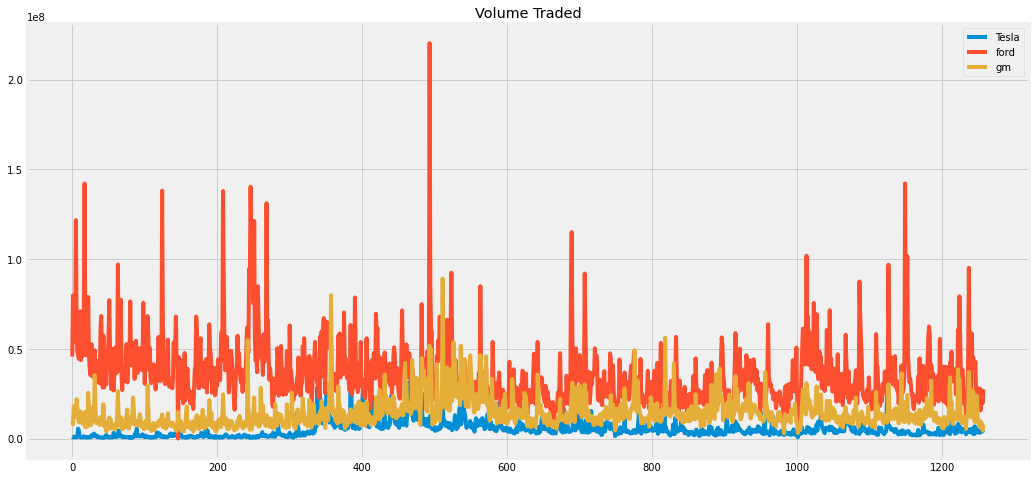

In [17]:
tesla['Volume'].plot(title='Volume Traded', figsize=(16,8), label='Tesla')
ford['Volume'].plot(label='ford')
gm['Volume'].plot(label='gm')
plt.legend()

** 值得注意的是，福特汽车的交易量在2013年底的某个时候大幅飙升。请问，福特汽车达到此最大交易量的日期是什么时候？**

**有兴趣的同学可以搜索一下看看当天发生了什么事:D **

In [18]:
ford.loc[ford['Volume'].idxmax()]['Date']

'2013-12-18'

____

** 开盘价格(Open price)时间序列可视化使特斯拉看起来比一般的通用汽车和福特汽车更有价值。但是要真正了解这一点，我们需要查看公司的总市值，而不仅仅是股票价格。不幸的是，我们当前的数据没有当前存货总单位的信息。但是，我们可以做一个简单的计算来表示交易的总金额的方法，用开盘价乘以交易量栏。请记住，这仍然不是实际的市值，而只是用于表示时间序列进行交易的总金额。 **

** 为每个dataframe创建一个新的列，称为“Total Traded”，即Open乘以Volume。**

In [19]:
# Code Here 
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

tesla.head()

,Date,Open,High,Low,Close,Volume,Total Traded
0,2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88
1,2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56
2,2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32
3,2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20
4,2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00


** 将该“Total Traded”与时间坐标轴配对作图。**

In [20]:
# Code here

Text(0, 0.5, 'Total Traded')

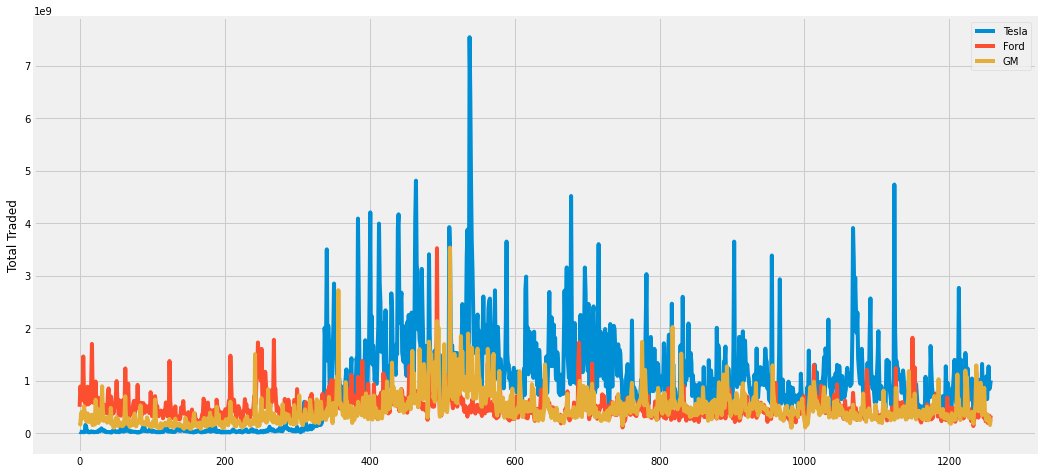

In [21]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
ford['Total Traded'].plot(label='Ford')
gm['Total Traded'].plot(label='GM')

plt.legend()
plt.ylabel('Total Traded')

** 有趣的是，似乎在2014年初某处特斯拉发生了巨额的资金交易。那是什么日期？ **

In [22]:
tesla.iloc[tesla['Total Traded'].argmax()]['Date']

'2014-02-25'

____

** 让我们练习绘制一些MA图（移动平均值）。绘制出用于通用汽车的MA50和MA200。 **

In [23]:
# Code here

<AxesSubplot:>

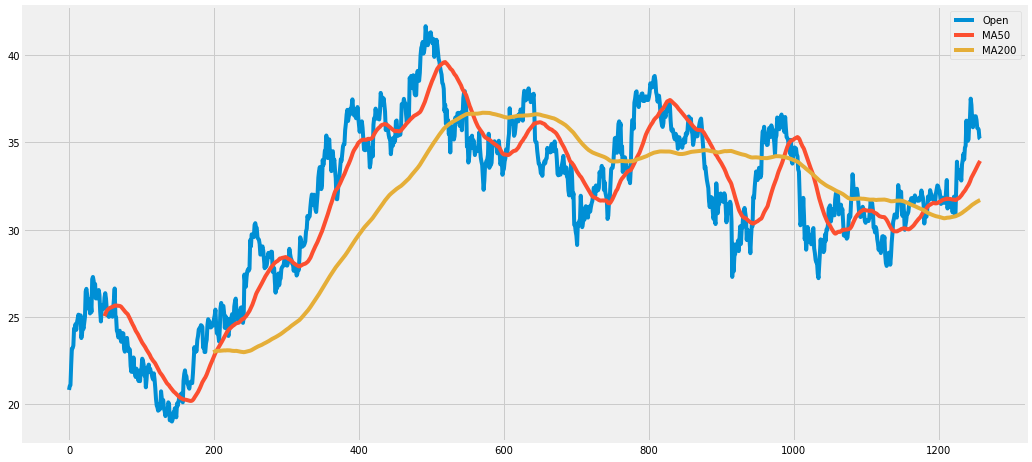

In [24]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label='gm',figsize=(16,8))

______

** 最后，让我们看看这些股票之间是否存在关联，毕竟它们都与汽车行业有关。我们可以通过散点图轻松地看到这一点。从pandas.plotting导入scatter_matrix并使用它创建所有股票开盘价的散点图。您可能需要将这些列重新排列为一个新的dataframe。 
    提示链接: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html **

In [25]:
from pandas.plotting import scatter_matrix

In [26]:
car_comp = pd.concat([tesla['Open'], gm['Open'], ford['Open']], axis = 1)
car_comp.columns = ['Tesla Open','GM Open','Ford Open']
car_comp.head()

,Tesla Open,GM Open,Ford Open
0,28.94,20.83,11.00
1,28.21,21.05,11.15
2,27.76,21.10,11.33
3,27.20,22.26,11.74
4,27.00,23.20,11.83


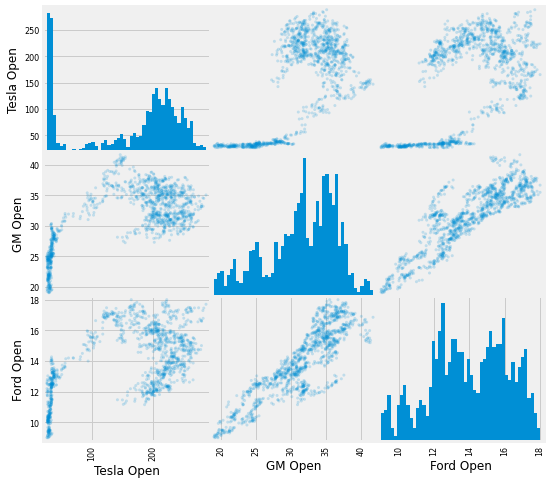

In [27]:
scatter_matrix(car_comp, alpha = 0.2, figsize = (8,8), hist_kwds={'bins':50});


_____
### 附加题! (注意: 有点难哦!)
**现在让我们创建一个烛台图表（candalestick chart)！ 提示: https://matplotlib.org/examples/pylab_examples/finance_demo.html**

** 创建如下图的福特公司于2012年一月份的烛台图表（注意：尝试不要把所有日期都画出来，太多日期会让图表的效果大打折扣。）**

In [4]:
import mplfinance as mpf

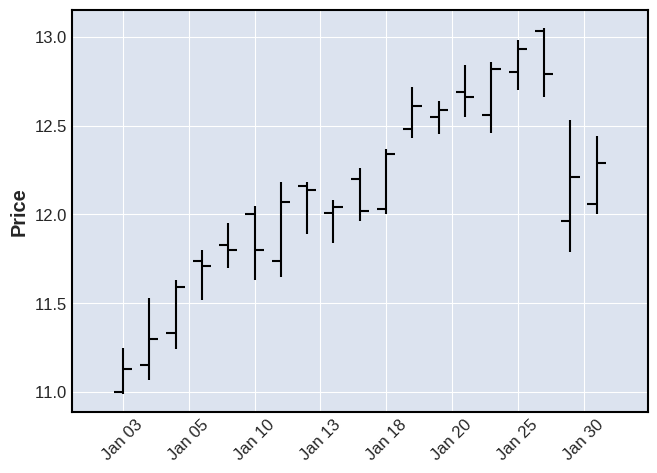

In [115]:
# 取出所有数据
val = ford.loc[:,["Date","Open","High","Low","Close","Volume"]]
val['Date'] = pd.to_datetime(val['Date'])
# 过滤指定日期数据
open_day='2012-01-01'
close_day='2012-01-31'
con1=val['Date']>=open_day
con2=val['Date']<close_day
val = val[con1&con2]
# 设定index
val=val.set_index('Date',drop=True)
# 画图
mpf.plot(val)

____
# Part 3: Basic Financial Analysis 基本分析

现在是时候集中精力进行一些关键的财务计算了。需要做的就是按照说明进行操作，这主要是使用python和pandas将数学公式或概念转换为代码的练习，这是在处理定量数据时经常会采用的方法。

让我们开始！
____

## Daily Percentage Change 每日百分比变化
首先，我们将从计算每日百分比变化开始。每日百分比变化公式定义如下：

$ r_t = \frac{p_t}{p_{t-1}} -1$

定义r_t（时间t的回报）等于时间t的价格除以时间t-1（前一天）的价格减去1。其实，这只是告诉你某天买入第二天出售的获利（或损失）百分比。虽然这对于尝试预测股票的未来价值不一定有帮助，但对分析股票的波动性却非常有帮助。如果日收益率分布广泛，则股票从一天到第二天的波动性更大。让我们计算回报百分比，然后使用直方图将其绘制出来，并确定哪种股票最稳定！

**  为每个dataframe新建一个称为returns的列。该列将从收盘价列计算。有两种方法可以执行此操作，要么利用上述公式，使用.shift（）函数进行简单计算，要么可以使用pandas库内置的pct_change函数。 **

In [116]:
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1

In [117]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Total Traded,returns
0,2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
1,2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2,2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
3,2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
4,2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


In [118]:
ford['returns'] = (ford['Close'] / ford['Close'].shift(1))-1

In [119]:
ford.head()

,Date,Open,High,Low,Close,Volume,returns
Date,,,,,,,
0,2012-01-03,11.00,11.25,10.99,11.13,45709811,NaN
1,2012-01-04,11.15,11.53,11.07,11.30,79725188,0.015274
2,2012-01-05,11.33,11.63,11.24,11.59,67877467,0.025664
3,2012-01-06,11.74,11.80,11.52,11.71,59840605,0.010354
4,2012-01-09,11.83,11.95,11.70,11.80,53981467,0.007686


In [120]:
gm['returns'] = (gm['Close'] / gm['Close'].shift(1))-1


In [121]:
gm.head()

,Date,Open,High,Low,Close,Volume,Total Traded,MA50,MA200,returns
0,2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN,NaN,NaN
1,2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,NaN,NaN,0.004751
2,2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,NaN,NaN,0.048227
3,2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,NaN,NaN,0.033829
4,2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,NaN,NaN,-0.003490


,Open,High,Low,Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN,NaN,NaN
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,NaN,NaN,0.004751
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,NaN,NaN,0.048227
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,NaN,NaN,0.033829
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,NaN,NaN,-0.003490


** 现在绘制每个公司收益的直方图。可以分别进行处理，也可以将它们堆叠在一起。哪只股票最“动荡”？ （根据日收益率的变化判断，注释作答）**

<AxesSubplot:title={'center':'tesla'}>

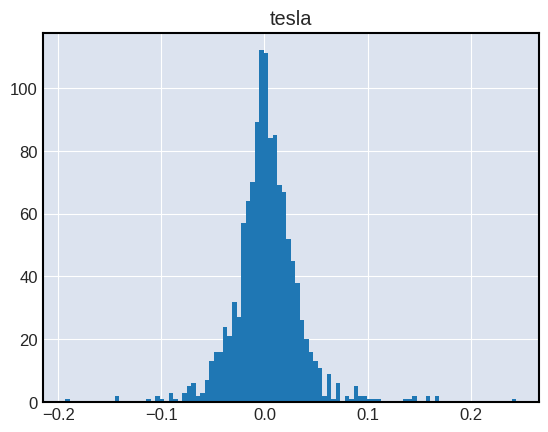

In [125]:
plt.title("tesla")
tesla['returns'].hist(bins = 100)

<AxesSubplot:title={'center':'ford'}>

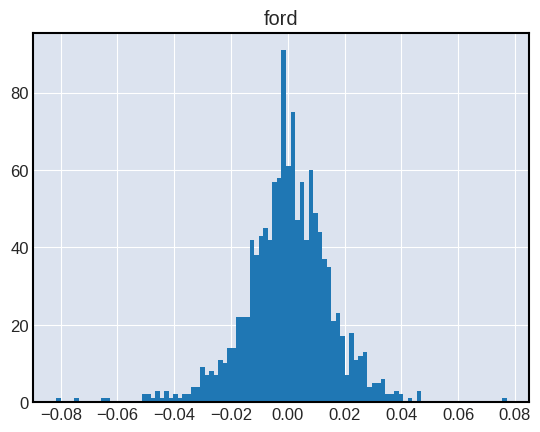

In [126]:
plt.title("ford")
ford['returns'].hist(bins = 100)

<AxesSubplot:title={'center':'gm'}>

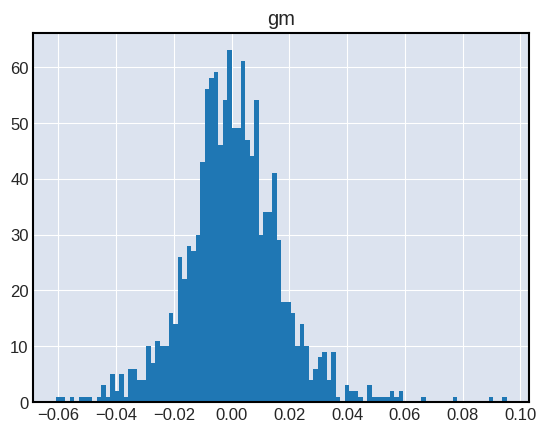

In [127]:
plt.title("gm")
gm['returns'].hist(bins = 100)

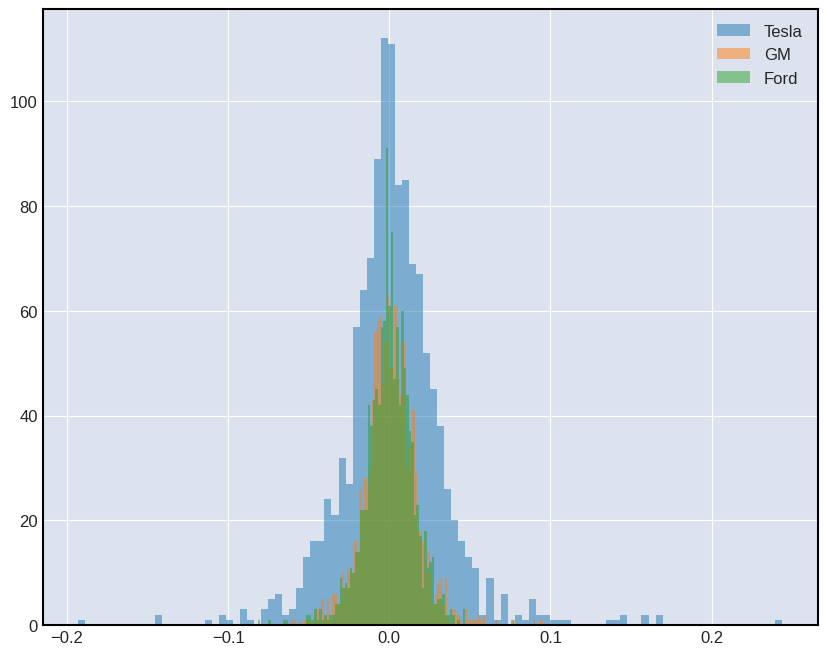

In [128]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

** 尝试换一种方式，来绘制KDE图。哪只股票的范围最宽？（注释作答） **

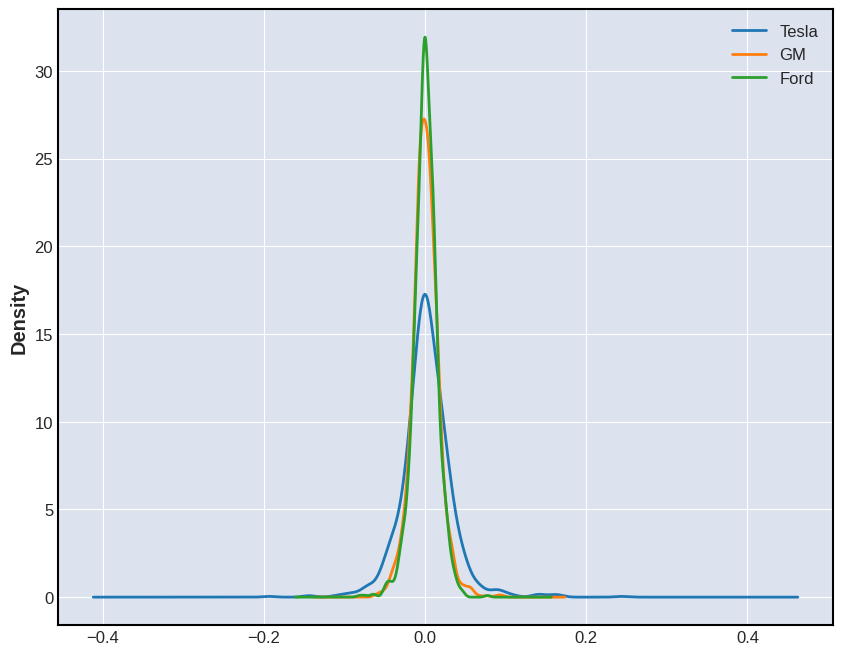

In [143]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(10,8))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()
# 特斯拉的股票范围最宽

** 再尝试创建三个箱形图以比较收益。 **

<AxesSubplot:>

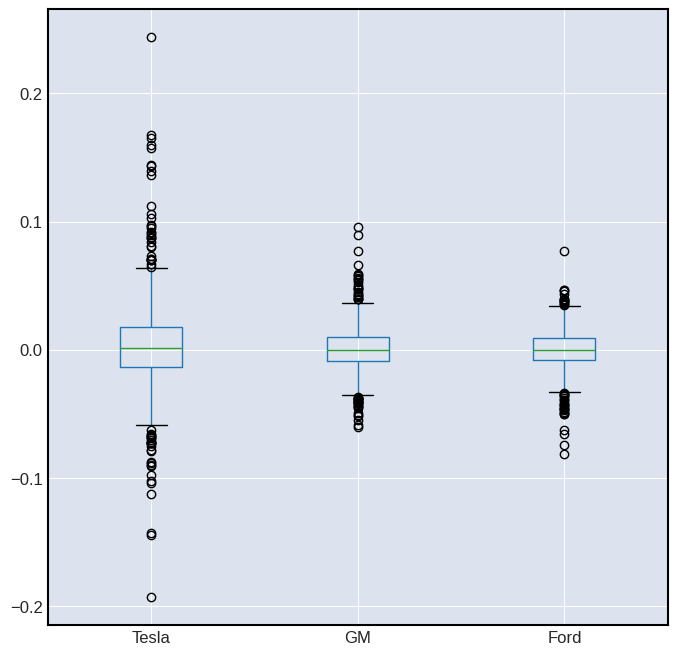

In [130]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla','GM','Ford']
box_df.plot(kind='box',figsize=(8,8))

## 比较股票的日收益

** 创建一个散点矩阵图，以查看每个股票日收益之间的相关性。这有助于回答汽车公司之间相关性的问题。从市场上看，特斯拉是否开始更多地被视为技术公司而不是汽车公司呢？**

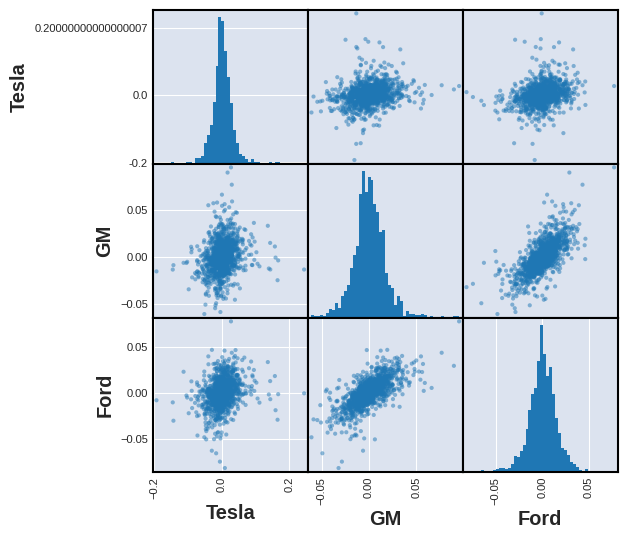

In [136]:
scatter_matrix(box_df,figsize=(6,6),alpha=0.5,hist_kwds={'bins':50});

** 看起来福特和通用汽车确实有某种可能的关系，让我们在散点图中将这两家公司的收益作为坐标轴来画图，以便更仔细地观察这一点！**

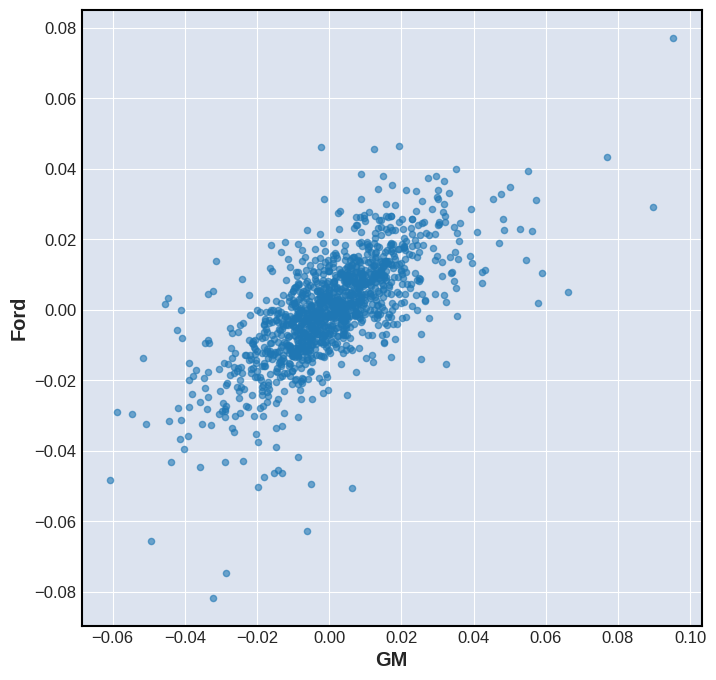

In [134]:
box_df.plot(kind='scatter',x='GM',y='Ford',alpha=0.6,figsize=(8,8));

____
## 累计日收益

Great！现在我们可以看到哪支股票的日收益率变化范围最广（你应该已经意识到是特斯拉，从我们的原始股价图中也显而易见）。

对于累计日收益，我们要回答的问题是，如果我在时间序列开始时向公司投资1美元，那么今天的价值是多少？这与当日的股票价格不同，因为它将考虑所有的日收益。请记住，此处的简单计算将不考虑会返还股息的股票。让我们看一些简单的例子：

假设有一个股票叫ABC，它在交易市场中很活跃。ABC的如下日期内对应的股价是：

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return 每日收益** : 每日收益是股票与前一天相比的利润/损失。（这就是我们在上面刚刚完成的计算）。大于1的值表示利润，小于1的值表示亏损。或者它也可以以百分比表示来更好地传达信息。（以百分比表示时，如果值大于0，则股票实现了利润，否则亏损）。因此，对于上面的示例，每日收益为：

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return 累计收益**: 尽管计算每日收益很有用，但它并不能使投资者立即了解他迄今为止所获得的收益，尤其是在股票非常波动的情况下。而累计收益则是相对于进行投资的当日一直到现在来进行计算的。如果累计收益高于1，则说明你正在获利，否则将蒙受损失。因此，对于上面的示例，累积收益如下：

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

累计日收益的公式为:

$ i_i = (1+r_t) * i_{t-1} $

 利用Pandas计算累计日收益非常简单，只需调用cumprod()函数。使用方法如下：

    df[daily_cum_ret] = ( 1 + df[pct_daily_ret] ).cumprod()
    

** 为每个汽车公司的dataframe创建一个累计日收益率(Cumulative Return)的列。**

In [137]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

In [138]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Total Traded,returns,Cumulative Return
0,2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN
1,2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,0.986823
2,2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,0.965812
3,2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,0.957621
4,2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,0.970442


** 现在，绘制出累计收益率的时间序列图。投资1美元，哪只股票的投资回报最高？哪个最低？**

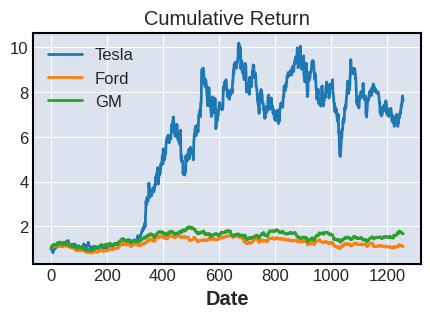

In [142]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(5,3),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()

# Great Job!
